### Import dependencies

In [413]:
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
from matplotlib import pyplot as plt

import numpy as np
import imutils
import cv2

##### Function to compute midpoint from two points

In [414]:
def midpoint(ptA, ptB):
	return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

Define width of left most object in image and image-path

In [482]:
width =  27.4 # change when new reference object
image_path = "Images/Test_3_180.jpg"

### Load and blur image slightly

In [483]:
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)

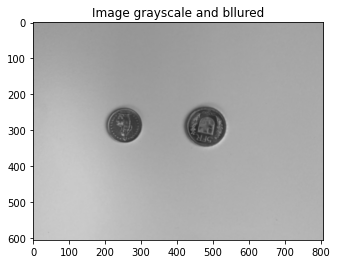

In [484]:
gray_show = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
plt.imshow(gray_show)
plt.title("Image grayscale and bllured")
plt.show()

### Edge detection and dilation and erotion to close gaps between object edges

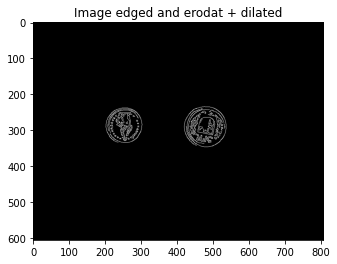

In [485]:
edged = cv2.Canny(gray, 50, 100)
edged_show = cv2.cvtColor(edged, cv2.COLOR_GRAY2RGB)
plt.imshow(edged_show)
plt.title("Image edged ")
plt.show()

In [486]:
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.erode(edged, None, iterations=1)

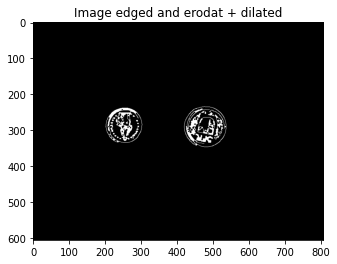

In [487]:
edged_show = cv2.cvtColor(edged, cv2.COLOR_GRAY2RGB)
plt.imshow(edged_show)
plt.title("Image edged and erodat + dilated")
plt.show()

### Find contours in edged image

In [488]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

### Sort contours from left ro right so that left most object is reference object

In [489]:
(cnts, _) = contours.sort_contours(cnts)
pixelsPerMetric = None

27.4 26.043564356435642


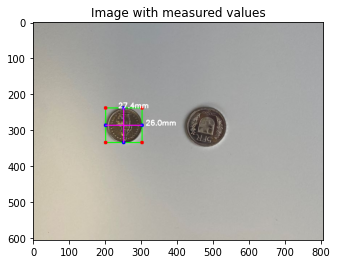

31.469306930693065 30.384158415841583


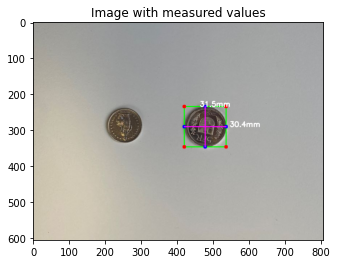

In [490]:

for c in cnts:
	# if the contour is not sufficiently large, ignore it
	if cv2.contourArea(c) < 1900:
		continue
	
	# compute the rotated bounding box of the contour
	orig = image.copy()
	box = cv2.minAreaRect(c)
	box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
	box = np.array(box, dtype="int")

	# order the points in the contour such that they appear
	# in top-left, top-right, bottom-right, and bottom-left
	# order, then draw the outline of the rotated bounding
	# box
	box = perspective.order_points(box)
	cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)

	# loop over the original points and draw them
	for (x, y) in box:
		cv2.circle(orig, (int(x), int(y)), 5, (0, 0, 255), -1)

	# unpack the ordered bounding box, then compute the midpoint
	# between the top-left and top-right coordinates, followed by
	# the midpoint between bottom-left and bottom-right coordinates
	(tl, tr, br, bl) = box
	(tltrX, tltrY) = midpoint(tl, tr)
	(blbrX, blbrY) = midpoint(bl, br)

	# compute the midpoint between the top-left and top-right points,
	# followed by the midpoint between the top-righ and bottom-right
	(tlblX, tlblY) = midpoint(tl, bl)
	(trbrX, trbrY) = midpoint(tr, br)

	# draw the midpoints on the image
	cv2.circle(orig, (int(tltrX), int(tltrY)), 5, (255, 0, 0), -1)
	cv2.circle(orig, (int(blbrX), int(blbrY)), 5, (255, 0, 0), -1)
	cv2.circle(orig, (int(tlblX), int(tlblY)), 5, (255, 0, 0), -1)
	cv2.circle(orig, (int(trbrX), int(trbrY)), 5, (255, 0, 0), -1)

	# draw lines between the midpoints
	cv2.line(orig, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)),
		(255, 0, 255), 2)
	cv2.line(orig, (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)),
		(255, 0, 255), 2)

	# compute the Euclidean distance between the midpoints
	dA = dist.euclidean((tltrX, tltrY), (blbrX, blbrY))
	dB = dist.euclidean((tlblX, tlblY), (trbrX, trbrY))

	# compute the pixel/perMetric as the ratio of pixels to supplied metric
	# (in this case, cm)
	
	if pixelsPerMetric is None:
		pixelsPerMetric = dB / width

	# compute the size of the object
	dimA = dA / pixelsPerMetric
	dimB = dB / pixelsPerMetric

	# draw the object sizes on the image
	cv2.putText(orig, "{:.1f}mm".format(dimB),
		(int(tltrX - 15), int(tltrY)), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255, 255, 255), 2)
	cv2.putText(orig, "{:.1f}mm".format(dimA),
		(int(trbrX + 10), int(trbrY)), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255, 255, 255), 2)
	
	

	# show the output image
	print(dimB, dimA)
	orig_show = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
	
	plt.imshow(orig_show)
	plt.title("Image with measured values")
	plt.show()
	
	cv2.imshow("Image", orig)

	cv2.waitKey(0)
		

cv2.destroyAllWindows()

	
	
		
	
		
	
	
	
		